In [46]:
import scipy.io
import matplotlib.pyplot as plt
from scipy.special import expit
import numpy as np
%matplotlib inline

In [30]:

mat = scipy.io.loadmat('ejemplo_regresion.mat')
x = mat.get('x')
y = mat.get('y')
t = mat.get('t')
consumo_mat = scipy.io.loadmat('consumoDB.mat')
hrsignal_mat = scipy.io.loadmat('HRsignal.mat')

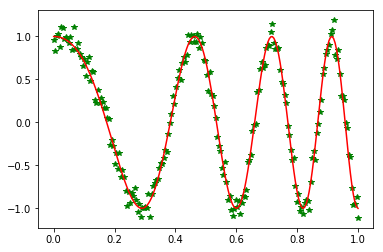

In [31]:
plt.figure
plt.plot(x, t, '*g')
plt.plot(x, y, '-r')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Oct 31 14:34:17 2018', '__version__': '1.0', '__globals__': [], 'HR': array([[ 764.43494819],
       [ 636.02893546],
       [1071.12188151],
       ...,
       [ 607.99773725],
       [ 477.8104778 ],
       [ 675.59136235]]), 'x': array([[0.00000000e+00, 1.53209744e-04, 3.06419488e-04, ...,
        9.99693581e-01, 9.99846790e-01, 1.00000000e+00]])}


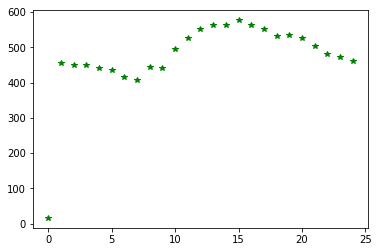

In [34]:
consumo_x = consumo_mat.get('x')
consumo_t = consumo_mat.get('t')
plt.figure
plt.plot(consumo_x, consumo_t, '*g')

In [112]:
M = 11

In [113]:
def BFunction(xi, M, Fbase):
    phiXn = np.zeros(M)
    idP = np.linspace(0, M - 1, M)
    if(Fbase == 'poly'):
        phiXn = np.power(xi, idP)
    #if(Fbase == 'rbf'):
    #    phiXn = np.power(xi, idP)
    if(Fbase == 'sigmod'):
        phiXn = expit(xi)
    return phiXn

def MBFunction(x_vect, M, Fbase):
    N = np.size(x_vect)
    PHIX = np.zeros([N,M])
    for i in range(0,N):
        PHIX[i,:] = BFunction(x_vect[i],M,Fbase)
    return PHIX

In [114]:
mPHIX = MBFunction(consumo_x, M, 'poly')
mPHIXT = mPHIX.T
mPHIXT_pw2_inv = np.linalg.inv(mPHIXT.dot(mPHIX))
w_ml = mPHIXT_pw2_inv.dot(mPHIXT.dot(consumo_t))
yEst = mPHIX.dot(w_ml)

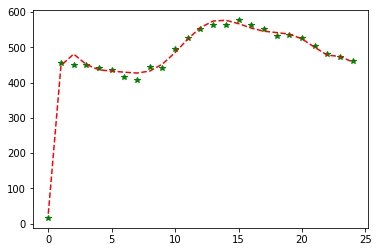

In [115]:
plt.plot(consumo_x, consumo_t, '*g')
plt.plot(consumo_x, yEst, '--r')

In [82]:
mPHIX = MBFunction(consumo_x, M, 'sigmod')
mPHIXT = mPHIX.T
mPHIXT_pw2_inv = np.linalg.inv(mPHIXT.dot(mPHIX))
w_ml = mPHIXT_pw2_inv.dot(mPHIXT.dot(consumo_t))
yEst = mPHIX.dot(w_ml)

LinAlgError: Singular matrix

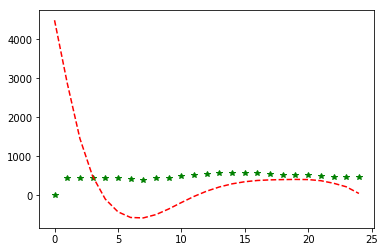

In [83]:
plt.plot(consumo_x, consumo_t, '*g')
plt.plot(consumo_x, yEst, '--r')